<a href="https://colab.research.google.com/github/hr1588/NLP/blob/main/ner_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.9 MB/s eta 0:00:00


# conll2012

In [2]:
from datasets import load_dataset

## v12

In [3]:
v12_dataset = load_dataset("conll2012_ontonotesv5", 'english_v12')
v12_dataset

Generating train split:   0%|          | 0/10539 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1370 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1200 [00:00<?, ? examples/s]

Dataset conll2012_ontonotesv5 downloaded and prepared to /root/.cache/huggingface/datasets/conll2012_ontonotesv5/english_v12/1.0.0/c541e760a5983b07e403e77ccf1f10864a6ae3e3dc0b994112eff9f217198c65. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 10539
    })
    validation: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 1370
    })
    test: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 1200
    })
})

In [4]:
for key, value in v12_dataset['train'].features.items():
    print(f"{key}: {value}")

document_id: Value(dtype='string', id=None)
sentences: [{'part_id': Value(dtype='int32', id=None), 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(names=['XX', '``', '$', "''", '*', ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'VERB', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None), 'parse_tree': Value(dtype='string', id=None), 'predicate_lemmas': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'predicate_framenet_ids': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'word_senses': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), 'speaker': Value(dtype='string', id=None), 'named_entities': Sequence(feature=ClassLabel(

In [5]:
tags = v12_dataset['train'].features['sentences'][0]['named_entities']
tags

Sequence(feature=ClassLabel(names=['O', 'B-PERSON', 'I-PERSON', 'B-NORP', 'I-NORP', 'B-FAC', 'I-FAC', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'B-LOC', 'I-LOC', 'B-PRODUCT', 'I-PRODUCT', 'B-DATE', 'I-DATE', 'B-TIME', 'I-TIME', 'B-PERCENT', 'I-PERCENT', 'B-MONEY', 'I-MONEY', 'B-QUANTITY', 'I-QUANTITY', 'B-ORDINAL', 'I-ORDINAL', 'B-CARDINAL', 'I-CARDINAL', 'B-EVENT', 'I-EVENT', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'B-LAW', 'I-LAW', 'B-LANGUAGE', 'I-LANGUAGE'], id=None), length=-1, id=None)

## datasets로 시도

### train

In [ ]:
mini_train = v12_dataset['train']['sentences'][0]

In [ ]:
len(mini_train)

235

In [ ]:
words_list = []

for i in range(len(mini_train)):
    words_list.append(mini_train[i]['words'])

In [ ]:
ner_list = []

for i in range(len(mini_train)):
    ner_list.append(mini_train[i]['named_entities'])

In [ ]:
ner_list[0]

[0, 0, 0, 0, 0]

In [ ]:
import pandas as pd

train = pd.DataFrame([words_list, ner_list]).T
train.columns = ['tokens','ner_tags']
train

,tokens,ner_tags
0,"[What, kind, of, memory, ?]","[0, 0, 0, 0, 0]"
1,"[We, respectfully, invite, you, to, watch, a, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0]"
2,"[WW, II, Landmarks, on, the, Great, Earth, of,...","[31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3..."
3,"[Standing, tall, on, Taihang, Mountain, is, th...","[0, 0, 0, 11, 12, 0, 31, 32, 32, 32, 32, 32, 3..."
4,"[It, is, composed, of, a, primary, stele, ,, s...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
230,"[Taiwan, 's, investigation, department, and, p...","[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 0, 0..."
231,"[Well, ,, why, did, Taiwan, 's, investigation,...","[0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
232,"[Scholars, will, give, you, a, detailed, analy...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 0]"
233,"[On, August, 17, ,, Taiwan, 's, investigation,...","[0, 15, 16, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    235 non-null    object
 1   ner_tags  235 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [ ]:
train = train[:200]
train

,tokens,ner_tags
0,"[What, kind, of, memory, ?]","[0, 0, 0, 0, 0]"
1,"[We, respectfully, invite, you, to, watch, a, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0]"
2,"[WW, II, Landmarks, on, the, Great, Earth, of,...","[31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3..."
3,"[Standing, tall, on, Taihang, Mountain, is, th...","[0, 0, 0, 11, 12, 0, 31, 32, 32, 32, 32, 32, 3..."
4,"[It, is, composed, of, a, primary, stele, ,, s...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
195,"[More, than, 60, years, later, ,, Xu, Xiaobing...","[15, 16, 16, 16, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,..."
196,"[Dehuai, was, sitting, in, this, trench, direc...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
197,"[Oh, .]","[0, 0]"
198,"[Bullets, and, artillery, fire, whistled, past...","[0, 0, 0, 0, 0, 0, 0, 0, 0]"


### val

In [ ]:
mini_val = v12_dataset['validation']['sentences'][0]
mini_val[0]

{'part_id': 0,
 'words': ['In',
  'the',
  'summer',
  'of',
  '2005',
  ',',
  'a',
  'picture',
  'that',
  'people',
  'have',
  'long',
  'been',
  'looking',
  'forward',
  'to',
  'started',
  'emerging',
  'with',
  'frequency',
  'in',
  'various',
  'major',
  'Hong',
  'Kong',
  'media',
  '.'],
 'pos_tags': [18,
  14,
  25,
  18,
  13,
  5,
  14,
  25,
  47,
  28,
  44,
  33,
  43,
  42,
  33,
  18,
  41,
  42,
  18,
  25,
  18,
  19,
  19,
  26,
  26,
  28,
  8],
 'parse_tree': '(TOP(S(PP (IN In) (NP(NP (DT the)  (NN summer) )(PP (IN of) (NP (CD 2005) )))) (, ,) (NP(NP (DT a)  (NN picture) )(SBAR(WHNP (WDT that) )(S(NP (NNS people) )(VP (VBP have) (ADVP (RB long) )(VP (VBN been) (VP (VBG looking) (ADVP (RB forward) (PP (IN to) ))))))))(VP (VBD started) (S(VP (VBG emerging) (PP (IN with) (NP (NN frequency) ))(PP (IN in) (NP (JJ various)  (JJ major) (NML (NNP Hong)  (NNP Kong) ) (NNS media) ))))) (. .) ))',
 'predicate_lemmas': [None,
  None,
  None,
  None,
  None,
  None,
 

In [ ]:
words_list_v = []

for i in range(len(mini_val)):
    words_list_v.append(mini_val[i]['words'])

In [ ]:
ner_list_v = []

for i in range(len(mini_val)):
    ner_list_v.append(mini_val[i]['named_entities'])

In [ ]:
val = pd.DataFrame([words_list_v, ner_list_v]).T
val.columns = ['tokens','ner_tags']
val = val[:40]
val

,tokens,ner_tags
0,"[In, the, summer, of, 2005, ,, a, picture, tha...","[0, 15, 16, 16, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[With, their, unique, charm, ,, these, well, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, ..."
2,"[The, world, 's, fifth, Disney, park, will, so...","[0, 0, 0, 25, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,"[The, most, important, thing, about, Disney, i...","[0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[Well, ,, for, several, years, ,, although, it...","[0, 0, 0, 15, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
5,"[Then, welcome, to, the, official, writing, ce...","[0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 6, 0]"
6,"[The, construction, of, Hong, Kong, Disneyland...","[0, 0, 0, 5, 6, 6, 0, 15, 16, 16, 0, 0, 15, 0]"
7,"[In, January, of, that, year, ,, the, Hong, Ko...","[0, 15, 16, 16, 16, 0, 0, 9, 10, 0, 0, 0, 0, 7..."
8,"[One, .]","[27, 0]"
9,"[Since, then, ,, this, area, has, become, a, p...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 10, 0]"


### test

In [ ]:
mini_test = v12_dataset['test']['sentences'][0]
mini_test[0]

{'part_id': 0,
 'words': ['--',
  'basically',
  ',',
  'it',
  'was',
  'unanimously',
  'agreed',
  'upon',
  'by',
  'the',
  'various',
  'relevant',
  'parties',
  '.'],
 'pos_tags': [9, 33, 5, 31, 41, 33, 43, 18, 18, 14, 19, 19, 28, 8],
 'parse_tree': '(TOP(S (: --) (ADVP (RB basically) ) (, ,) (NP (PRP it) )(VP (VBD was) (ADVP (RB unanimously) )(VP (VBN agreed) (PP (IN upon) )(PP (IN by) (NP (DT the)  (JJ various)  (JJ relevant)  (NNS parties) )))) (. .) ))',
 'predicate_lemmas': [None,
  None,
  None,
  None,
  'be',
  None,
  'agree',
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'predicate_framenet_ids': [None,
  None,
  None,
  None,
  '03',
  None,
  '01',
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'word_senses': [None,
  None,
  None,
  None,
  None,
  None,
  1.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'speaker': 'speaker#1',
 'named_entities': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'srl_frames': [{'verb': 'was',
   'fra

In [ ]:
words_list_t = []

for i in range(len(mini_test)):
    words_list_t.append(mini_test[i]['words'])

In [ ]:
ner_list_t = []

for i in range(len(mini_test)):
    ner_list_t.append(mini_test[i]['named_entities'])

In [ ]:
test = pd.DataFrame([words_list_t, ner_list_t]).T
test.columns = ['tokens','ner_tags']
test = test[:40]
test.tail()

,tokens,ner_tags
35,"[The, station, called, me, at, noon, and, said...","[0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 5, 6, 0, 0,..."
36,"[Uh-huh, ,, that, means, ,, er, ,, you, found,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
37,"[Right, ,, right, ,, right, .]","[0, 0, 0, 0, 0, 0]"
38,"[Uh-huh, .]","[0, 0]"
39,"[Well, ,, like, Professor, Zhou, ,, I, also, r...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## datasets 제작

### 1. dict(실패)

In [ ]:
train_set = train.to_dict('records')

In [ ]:
train_set[0]

{'tokens': ['What', 'kind', 'of', 'memory', '?'], 'ner_tags': [0, 0, 0, 0, 0]}

In [ ]:
element = train_set[0]
for key, value in element.items():
  print(f"{key}:{value}")

tokens:['What', 'kind', 'of', 'memory', '?']
ner_tags:[0, 0, 0, 0, 0]


In [ ]:
len(train_set)

235

In [ ]:
type(train_set)

list

### 2. pandas to datasetdict

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train)
val_dataset = Dataset.from_pandas(val)
test_dataset = Dataset.from_pandas(test)

In [ ]:
from datasets.dataset_dict import DatasetDict

raw_data = {
     'train':Dataset.from_dict({'tokens':train_dataset['tokens'], 'ner_tags' : train_dataset['ner_tags']}),
     'val':Dataset.from_dict({'tokens':val_dataset['tokens'], 'ner_tags' : val_dataset['ner_tags']}),
     'test':Dataset.from_dict({'tokens':test_dataset['tokens'], 'ner_tags' : test_dataset['ner_tags']})
     }

raw_data = DatasetDict(raw_data)

In [ ]:
raw_data 

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 200
    })
    val: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 40
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 40
    })
})

In [ ]:
element = raw_data['train'][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['What', 'kind', 'of', 'memory', '?']
ner_tags: [0, 0, 0, 0, 0]


In [ ]:
element = raw_data['val'][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['In', 'the', 'summer', 'of', '2005', ',', 'a', 'picture', 'that', 'people', 'have', 'long', 'been', 'looking', 'forward', 'to', 'started', 'emerging', 'with', 'frequency', 'in', 'various', 'major', 'Hong', 'Kong', 'media', '.']
ner_tags: [0, 15, 16, 16, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 10, 0, 0]


In [ ]:
element = raw_data['test'][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['--', 'basically', ',', 'it', 'was', 'unanimously', 'agreed', 'upon', 'by', 'the', 'various', 'relevant', 'parties', '.']
ner_tags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for key, value in raw_data['train'].features.items():
    print(f"{key} : {value}")

tokens : Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags : Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)


In [ ]:
raw_data['train'].features['ner_tags'].feature

Value(dtype='int64', id=None)

## 성공은 했지만, feature value가 날아가서 다른 방법 탐색(2/15)

In [6]:
v12_dataset

DatasetDict({
    train: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 10539
    })
    validation: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 1370
    })
    test: Dataset({
        features: ['document_id', 'sentences'],
        num_rows: 1200
    })
})

In [9]:
def get_words(n):
    return n['words']

In [14]:
def get_ner_tags(n):
    return n['named_entities']

In [21]:
train_words = list(map(get_words, v12_dataset['train']['sentences'][0]))[:100]

In [22]:
train_tags = list(map(get_ner_tags, v12_dataset['train']['sentences'][0]))[:100]

In [25]:
print(len(train_words), len(train_tags))

100 100


In [26]:
val_words = list(map(get_words, v12_dataset['validation']['sentences'][0]))[:20]
val_tags = list(map(get_ner_tags, v12_dataset['validation']['sentences'][0]))[:20]

In [27]:
test_words = list(map(get_words, v12_dataset['test']['sentences'][0]))[:20]
test_tags = list(map(get_ner_tags, v12_dataset['test']['sentences'][0]))[:20]

In [28]:
from datasets import DatasetDict, Dataset

train_data_dict = {'tokens' : train_words, 'ner_tags' : train_tags}
train_dataset = Dataset.from_dict(train_data_dict)

val_data_dict = {'tokens' : val_words, 'ner_tags' : val_tags}
val_dataset = Dataset.from_dict(val_data_dict)

test_data_dict = {'tokens' : test_words, 'ner_tags' : test_tags}
test_dataset = Dataset.from_dict(test_data_dict)

dataset_dict = DatasetDict({'train' : train_dataset, 'val' : val_dataset, 'test' : test_dataset})
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 100
    })
    val: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 20
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 20
    })
})

In [77]:
element = dataset_dict['train'][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['What', 'kind', 'of', 'memory', '?']
ner_tags: [0, 0, 0, 0, 0]


In [52]:
num_classes = len(tags.feature.names)
num_classes

37

In [73]:
from datasets import DatasetDict, ClassLabel
ner_labels = ClassLabel(names=tags.feature.names, num_classes=num_classes)

In [74]:
ner_labels

ClassLabel(names=['O', 'B-PERSON', 'I-PERSON', 'B-NORP', 'I-NORP', 'B-FAC', 'I-FAC', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'B-LOC', 'I-LOC', 'B-PRODUCT', 'I-PRODUCT', 'B-DATE', 'I-DATE', 'B-TIME', 'I-TIME', 'B-PERCENT', 'I-PERCENT', 'B-MONEY', 'I-MONEY', 'B-QUANTITY', 'I-QUANTITY', 'B-ORDINAL', 'I-ORDINAL', 'B-CARDINAL', 'I-CARDINAL', 'B-EVENT', 'I-EVENT', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'B-LAW', 'I-LAW', 'B-LANGUAGE', 'I-LANGUAGE'], id=None)

In [76]:
for split in ['train', 'val', 'test']:
    dataset_dict[split].features['ner_tags'].feature = ner_labels

In [83]:
tags = dataset_dict['train'].features['ner_tags'].feature
tags

ClassLabel(names=['O', 'B-PERSON', 'I-PERSON', 'B-NORP', 'I-NORP', 'B-FAC', 'I-FAC', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'B-LOC', 'I-LOC', 'B-PRODUCT', 'I-PRODUCT', 'B-DATE', 'I-DATE', 'B-TIME', 'I-TIME', 'B-PERCENT', 'I-PERCENT', 'B-MONEY', 'I-MONEY', 'B-QUANTITY', 'I-QUANTITY', 'B-ORDINAL', 'I-ORDINAL', 'B-CARDINAL', 'I-CARDINAL', 'B-EVENT', 'I-EVENT', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'B-LAW', 'I-LAW', 'B-LANGUAGE', 'I-LANGUAGE'], id=None)

In [82]:
for key, value in dataset_dict['train'].features.items():
    print(f"{key} : {value}")

tokens : Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags : Sequence(feature=ClassLabel(names=['O', 'B-PERSON', 'I-PERSON', 'B-NORP', 'I-NORP', 'B-FAC', 'I-FAC', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'B-LOC', 'I-LOC', 'B-PRODUCT', 'I-PRODUCT', 'B-DATE', 'I-DATE', 'B-TIME', 'I-TIME', 'B-PERCENT', 'I-PERCENT', 'B-MONEY', 'I-MONEY', 'B-QUANTITY', 'I-QUANTITY', 'B-ORDINAL', 'I-ORDINAL', 'B-CARDINAL', 'I-CARDINAL', 'B-EVENT', 'I-EVENT', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'B-LAW', 'I-LAW', 'B-LANGUAGE', 'I-LANGUAGE'], id=None), length=-1, id=None)


In [84]:
def create_tag_names(batch):
    return{"ner_tags_str" : [tags.int2str(idx) for idx in batch['ner_tags']]}

In [85]:
ner_dataset = dataset_dict.map(create_tag_names)
ner_dataset

  0%|          | 0/100 [00:00<?, ?ex/s]

  0%|          | 0/20 [00:00<?, ?ex/s]

  0%|          | 0/20 [00:00<?, ?ex/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'ner_tags_str'],
        num_rows: 100
    })
    val: Dataset({
        features: ['tokens', 'ner_tags', 'ner_tags_str'],
        num_rows: 20
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'ner_tags_str'],
        num_rows: 20
    })
})

In [87]:
import pandas as pd

train_example = ner_dataset['train'][0]
pd.DataFrame([train_example['tokens'], train_example['ner_tags_str']], ['Tokens','Tags'])

,0,1,2,3,4
Tokens,What,kind,of,memory,?
Tags,O,O,O,O,O


In [91]:
from collections import Counter, defaultdict

split2freqs = defaultdict(Counter)

for split, dataset in ner_dataset.items():
    for row in dataset['ner_tags_str']:
        for tag in row:
            if tag.startswith('B'):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1

pd.DataFrame.from_dict(split2freqs, orient = 'index').T

,train,val,test
ORG,30.0,7.0,5.0
WORK_OF_ART,3.0,NaN,NaN
LOC,11.0,2.0,NaN
CARDINAL,25.0,1.0,3.0
EVENT,11.0,NaN,NaN
NORP,24.0,1.0,1.0
GPE,58.0,5.0,3.0
DATE,17.0,10.0,3.0
PERSON,21.0,NaN,3.0
FAC,17.0,7.0,2.0


## 모델 만들기

In [92]:
!pip install transformers -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.4 MB/s eta 0:00:00


In [94]:
from transformers import AutoTokenizer

bert_model_name = 'bert-base-cased'
xlmr_model_name = 'xlm-roberta-base'

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [96]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
       
        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, 
                labels=None, **kwargs):
       
        outputs = self.roberta(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)
        
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        
        return TokenClassifierOutput(loss=loss, logits=logits, 
                                     hidden_states=outputs.hidden_states, 
                                     attentions=outputs.attentions)

In [98]:
tags

ClassLabel(names=['O', 'B-PERSON', 'I-PERSON', 'B-NORP', 'I-NORP', 'B-FAC', 'I-FAC', 'B-ORG', 'I-ORG', 'B-GPE', 'I-GPE', 'B-LOC', 'I-LOC', 'B-PRODUCT', 'I-PRODUCT', 'B-DATE', 'I-DATE', 'B-TIME', 'I-TIME', 'B-PERCENT', 'I-PERCENT', 'B-MONEY', 'I-MONEY', 'B-QUANTITY', 'I-QUANTITY', 'B-ORDINAL', 'I-ORDINAL', 'B-CARDINAL', 'I-CARDINAL', 'B-EVENT', 'I-EVENT', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'B-LAW', 'I-LAW', 'B-LANGUAGE', 'I-LANGUAGE'], id=None)

In [99]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [100]:
index2tag

{0: 'O',
 1: 'B-PERSON',
 2: 'I-PERSON',
 3: 'B-NORP',
 4: 'I-NORP',
 5: 'B-FAC',
 6: 'I-FAC',
 7: 'B-ORG',
 8: 'I-ORG',
 9: 'B-GPE',
 10: 'I-GPE',
 11: 'B-LOC',
 12: 'I-LOC',
 13: 'B-PRODUCT',
 14: 'I-PRODUCT',
 15: 'B-DATE',
 16: 'I-DATE',
 17: 'B-TIME',
 18: 'I-TIME',
 19: 'B-PERCENT',
 20: 'I-PERCENT',
 21: 'B-MONEY',
 22: 'I-MONEY',
 23: 'B-QUANTITY',
 24: 'I-QUANTITY',
 25: 'B-ORDINAL',
 26: 'I-ORDINAL',
 27: 'B-CARDINAL',
 28: 'I-CARDINAL',
 29: 'B-EVENT',
 30: 'I-EVENT',
 31: 'B-WORK_OF_ART',
 32: 'I-WORK_OF_ART',
 33: 'B-LAW',
 34: 'I-LAW',
 35: 'B-LANGUAGE',
 36: 'I-LANGUAGE'}

In [102]:
tag2index

{'O': 0,
 'B-PERSON': 1,
 'I-PERSON': 2,
 'B-NORP': 3,
 'I-NORP': 4,
 'B-FAC': 5,
 'I-FAC': 6,
 'B-ORG': 7,
 'I-ORG': 8,
 'B-GPE': 9,
 'I-GPE': 10,
 'B-LOC': 11,
 'I-LOC': 12,
 'B-PRODUCT': 13,
 'I-PRODUCT': 14,
 'B-DATE': 15,
 'I-DATE': 16,
 'B-TIME': 17,
 'I-TIME': 18,
 'B-PERCENT': 19,
 'I-PERCENT': 20,
 'B-MONEY': 21,
 'I-MONEY': 22,
 'B-QUANTITY': 23,
 'I-QUANTITY': 24,
 'B-ORDINAL': 25,
 'I-ORDINAL': 26,
 'B-CARDINAL': 27,
 'I-CARDINAL': 28,
 'B-EVENT': 29,
 'I-EVENT': 30,
 'B-WORK_OF_ART': 31,
 'I-WORK_OF_ART': 32,
 'B-LAW': 33,
 'I-LAW': 34,
 'B-LANGUAGE': 35,
 'I-LANGUAGE': 36}

In [104]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, 
                                         num_labels=len(tags.names),
                                         id2label=index2tag, label2id=tag2index)

In [105]:
import torch
from transformers import XLMRobertaForTokenClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification
              .from_pretrained(xlmr_model_name, config=xlmr_config)
              .to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-st

In [106]:
def tag_text(text, tags, model, tokenizer):
    
    tokens = tokenizer(text).tokens()
    input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
    outputs = model(input_ids)[0]
    
    predictions = torch.argmax(outputs, dim=2)
    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

In [108]:
words, labels = ner_dataset['train'][3]['tokens'], ner_dataset['train'][3]['ner_tags']

In [109]:
tokenized_input = xlmr_tokenizer(words, is_split_into_words = True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens],['Tokens'])

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Tokens,<s>,▁Stand,ing,▁tall,▁on,▁Tai,hang,▁Mountain,▁is,▁the,...,▁Hund,red,▁Regi,ments,▁Off,en,sive,▁,.,</s>


In [110]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index = ['Tokens','Word IDS'])

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Tokens,<s>,▁Stand,ing,▁tall,▁on,▁Tai,hang,▁Mountain,▁is,▁the,...,▁Hund,red,▁Regi,ments,▁Off,en,sive,▁,.,</s>
Word IDS,None,0,0,1,2,3,3,4,5,6,...,10,10,11,11,12,12,12,13,13,None


In [111]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx :
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens","Word IDs", 'Label ids', 'labels']

pd.DataFrame([tokens, word_ids, label_ids, labels], index = index)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Tokens,<s>,▁Stand,ing,▁tall,▁on,▁Tai,hang,▁Mountain,▁is,▁the,...,▁Hund,red,▁Regi,ments,▁Off,en,sive,▁,.,</s>
Word IDs,None,0,0,1,2,3,3,4,5,6,...,10,10,11,11,12,12,12,13,13,None
Label ids,-100,0,-100,0,0,11,-100,12,0,31,...,32,-100,32,-100,32,-100,-100,0,-100,-100
labels,IGN,O,IGN,O,O,B-LOC,IGN,I-LOC,O,B-WORK_OF_ART,...,I-WORK_OF_ART,IGN,I-WORK_OF_ART,IGN,I-WORK_OF_ART,IGN,IGN,O,IGN,IGN


In [112]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, 
                                      is_split_into_words=True)
    labels = []
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx
        labels.append(label_ids)
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [113]:
def encode_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, 
                      remove_columns=['ner_tags', 'tokens'])

In [114]:
data_encoded = encode_dataset(ner_dataset)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [115]:
data_encoded['train'][0]

{'ner_tags_str': ['O', 'O', 'O', 'O', 'O'],
 'input_ids': [0, 4865, 8562, 111, 98323, 705, 2],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1],
 'labels': [-100, 0, 0, 0, 0, 0, -100]}

In [ ]:
print(data_encoded['val'][0])

{'input_ids': [0, 360, 70, 51065, 111, 4078, 6, 4, 10, 49726, 450, 3395, 765, 4989, 2809, 16487, 40225, 47, 26859, 50419, 9966, 678, 12478, 944, 27771, 23, 67842, 13036, 34854, 21415, 2450, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [-100, 0, 15, 16, 16, 16, 0, -100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, 0, 0, -100, -100, 0, 0, 0, 9, 10, 0, 0, -100, -100]}


In [ ]:
print(data_encoded['test'][0])

{'input_ids': [0, 4210, 198343, 6, 4, 442, 509, 220, 1956, 79850, 176506, 54799, 390, 70, 67842, 29191, 68036, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [-100, 0, 0, 0, -100, 0, 0, 0, -100, -100, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100]}


In [116]:
import numpy as np

def align_predictions(predictions, labels):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # 레이블 IDs = -100 무시
            if labels[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[labels[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, labels_list

In [117]:
from transformers import TrainingArguments

num_epochs = 2
batch_size = 16  
logging_steps = len(data_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs, 
    per_device_train_batch_size=batch_size, 
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch", 
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False, 
    logging_steps=logging_steps, push_to_hub=False)

In [118]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [119]:
!pip install seqeval -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [131]:
from seqeval.metrics import f1_score, accuracy_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, 
                                       eval_pred.label_ids)
    return {"acc": accuracy_score(y_true, y_pred)}

In [121]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [122]:
def model_init():
    return (XLMRobertaForTokenClassification
            .from_pretrained(xlmr_model_name, config=xlmr_config)
            .to(device))

In [ ]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [132]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args, 
                  data_collator=data_collator, compute_metrics=compute_metrics,
                  train_dataset=data_encoded["train"],
                  eval_dataset=data_encoded["val"], 
                  tokenizer=xlmr_tokenizer)

In [133]:
trainer.train()

Epoch,Training Loss,Validation Loss,Acc
1,2.565700,1.076879,0.820051
2,1.250500,1.026949,0.820051


TrainOutput(global_step=14, training_loss=1.7890215260641915, metrics={'train_runtime': 4.8195, 'train_samples_per_second': 41.498, 'train_steps_per_second': 2.905, 'total_flos': 9268759972008.0, 'train_loss': 1.7890215260641915, 'epoch': 2.0})

In [125]:
df = pd.DataFrame(trainer.state.log_history)[['epoch','loss' ,'eval_loss', 'eval_f1']]
df = df.rename(columns={"epoch":"Epoch","loss": "Training Loss", "eval_loss": "Validation Loss", "eval_f1":"F1"})
df['Epoch'] = df["Epoch"].apply(lambda x: round(x))
df['Training Loss'] = df["Training Loss"].ffill()
df[['Validation Loss', 'F1']] = df[['Validation Loss', 'F1']].bfill().ffill()
df.drop_duplicates()

,Epoch,Training Loss,Validation Loss,F1
0,1,2.5657,1.076879,0.0
2,2,1.2505,1.026949,0.0


In [126]:
outputs = trainer.predict(data_encoded["test"])

In [127]:
y_pred = outputs.predictions.argmax(1)
y_pred

array([[17, 20, 19, 19, 20,  4,  0,  8, 12, 16, 14, 18,  0,  0, 18, 20,
        12,  7, 19,  0,  0, 19,  0,  0,  8,  0,  8,  9,  8,  9, 19,  0,
        19,  0,  0,  0, 19],
       [ 8, 30, 29, 30, 30, 22,  0, 22, 14,  9, 26, 28,  0,  9, 28, 22,
        21, 29, 29,  0,  0, 29, 28,  0, 11,  0,  8, 19, 24,  9, 29,  0,
        29, 22,  0, 29, 22],
       [28, 37, 36, 37, 37, 35,  0,  0,  2,  8, 17, 35,  0,  0, 21, 37,
        22, 36, 36,  0,  0, 36, 35,  0,  4,  0,  1,  9, 17,  3, 36,  0,
        36,  0,  0, 36, 37],
       [ 2, 17, 16, 16, 16, 17,  0, 16,  4,  8,  4, 15,  0, 17, 15, 17,
        14, 16, 16,  0,  0, 16, 17,  0, 17,  0,  7,  3,  1,  8, 16,  0,
        17, 17,  0, 16, 17],
       [ 5,  8,  7,  7,  8,  8,  0,  6,  4,  3,  1,  6,  0,  8,  2,  8,
         5,  5,  7,  0,  0,  7,  8,  0,  8,  0,  1,  3,  0,  8,  7,  0,
         6,  8,  0,  0,  8],
       [ 6,  9,  8,  8,  9,  9,  0,  0,  5,  5,  4,  7,  0,  9,  4,  9,
         1,  1,  8,  0,  0,  8,  9,  0,  9,  0,  1,  6,  0,  9,

- 현재 성능 척도가 나오지 않음

# 미해결된 부분

## df로 확인(pandas로 해결 불가)

In [ ]:
v12_dataset.set_format(type = "pandas") 
df_train = v12_dataset["train"][:]
df_train.head()

,document_id,sentences
0,bc/cctv/00/cctv_0001,"[{'part_id': 0, 'words': ['What', 'kind', 'of'..."
1,bc/cctv/00/cctv_0002,"[{'part_id': 0, 'words': ['Abramov', 'had', 'a..."
2,bc/cctv/00/cctv_0003,"[{'part_id': 0, 'words': ['Hello', ',', 'dear'..."
3,bc/cctv/00/cctv_0004,"[{'part_id': 0, 'words': ['There', 'will', 'be..."
4,bc/cnn/00/cnn_0001,"[{'part_id': 0, 'words': ['Sunday', 'the', 'in..."


In [ ]:
len(df_train)

10539

In [ ]:
df_train['sentences'][0]

array([{'part_id': 0, 'words': array(['What', 'kind', 'of', 'memory', '?'], dtype=object), 'pos_tags': array([48, 25, 18, 25,  8]), 'parse_tree': '(TOP(SBARQ(WHNP(WHNP (WP What)  (NN kind) )(PP (IN of) (NP (NN memory) ))) (. ?) ))', 'predicate_lemmas': array([None, None, None, 'memory', None], dtype=object), 'predicate_framenet_ids': array([None, None, None, None, None], dtype=object), 'word_senses': array([nan, nan, nan,  1., nan], dtype=float32), 'speaker': 'Speaker#1', 'named_entities': array([0, 0, 0, 0, 0]), 'srl_frames': array([], dtype=object), 'coref_spans': array([], dtype=object)},
       {'part_id': 0, 'words': array(['We', 'respectfully', 'invite', 'you', 'to', 'watch', 'a',
              'special', 'edition', 'of', 'Across', 'China', '.'], dtype=object), 'pos_tags': array([31, 33, 40, 31, 38, 40, 14, 19, 25, 18, 26, 26,  8]), 'parse_tree': '(TOP(S(NP (PRP We) )(ADVP (RB respectfully) )(VP (VB invite) (NP (PRP you) )(S(VP (TO to) (VP (VB watch) (NP(NP (DT a)  (JJ special)  

In [ ]:
len(df_train['sentences'][0])

235

In [ ]:
df_train['sentences'][0][0]

{'part_id': 0,
 'words': array(['What', 'kind', 'of', 'memory', '?'], dtype=object),
 'pos_tags': array([48, 25, 18, 25,  8]),
 'parse_tree': '(TOP(SBARQ(WHNP(WHNP (WP What)  (NN kind) )(PP (IN of) (NP (NN memory) ))) (. ?) ))',
 'predicate_lemmas': array([None, None, None, 'memory', None], dtype=object),
 'predicate_framenet_ids': array([None, None, None, None, None], dtype=object),
 'word_senses': array([nan, nan, nan,  1., nan], dtype=float32),
 'speaker': 'Speaker#1',
 'named_entities': array([0, 0, 0, 0, 0]),
 'srl_frames': array([], dtype=object),
 'coref_spans': array([], dtype=object)}

In [ ]:
type(df_train['sentences'][0][0])

dict

In [ ]:
df_val = v12_dataset["validation"][:]
df_val.head()

,document_id,sentences
0,bc/cctv/00/cctv_0000,"[{'part_id': 0, 'words': ['In', 'the', 'summer..."
1,bc/cnn/00/cnn_0000,"[{'part_id': 0, 'words': ['A', 'much', 'better..."
2,bc/msnbc/00/msnbc_0000,"[{'part_id': 0, 'words': ['Hi', 'everyone', '/..."
3,bc/p2.5_a2e/00/p2.5_a2e_0010,"[{'part_id': 0, 'words': ['And', 'with', 'us',..."
4,bc/p2.5_a2e/00/p2.5_a2e_0020,"[{'part_id': 0, 'words': ['And', 'with', 'us',..."


In [ ]:
df_test = v12_dataset["test"][:]
df_test.head()

,document_id,sentences
0,bc/cctv/00/cctv_0005,"[{'part_id': 0, 'words': ['--', 'basically', '..."
1,bc/cnn/00/cnn_0008,"[{'part_id': 0, 'words': ['Iraq', 'in', 'the',..."
2,bc/msnbc/00/msnbc_0007,"[{'part_id': 0, 'words': ['Dealing', 'with', '..."
3,bc/p2.5_a2e/00/p2.5_a2e_0009,"[{'part_id': 0, 'words': ['And', 'in', 'follow..."
4,bc/p2.5_a2e/00/p2.5_a2e_0019,"[{'part_id': 0, 'words': ['Ah', 'undoubtedly',..."


https://huggingface.co/datasets/conll2012_ontonotesv5

### mini-train

### make dataset

In [ ]:
import pandas as pd
df_0 = pd.DataFrame(df_train['sentences'][0], columns = ['sentences'])
df_0

,sentences
0,"{'part_id': 0, 'words': ['What', 'kind', 'of',..."
1,"{'part_id': 0, 'words': ['We', 'respectfully',..."
2,"{'part_id': 0, 'words': ['WW', 'II', 'Landmark..."
3,"{'part_id': 0, 'words': ['Standing', 'tall', '..."
4,"{'part_id': 0, 'words': ['It', 'is', 'composed..."
...,...
230,"{'part_id': 8, 'words': ['Taiwan', ''s', 'inve..."
231,"{'part_id': 8, 'words': ['Well', ',', 'why', '..."
232,"{'part_id': 8, 'words': ['Scholars', 'will', '..."
233,"{'part_id': 8, 'words': ['On', 'August', '17',..."


In [ ]:
element = df_0['sentences'][0]

for key, value in element.items():
    print(f"{key}: {value}")

part_id: 0
words: ['What' 'kind' 'of' 'memory' '?']
pos_tags: [48 25 18 25  8]
parse_tree: (TOP(SBARQ(WHNP(WHNP (WP What)  (NN kind) )(PP (IN of) (NP (NN memory) ))) (. ?) ))
predicate_lemmas: [None None None 'memory' None]
predicate_framenet_ids: [None None None None None]
word_senses: [nan nan nan  1. nan]
speaker: Speaker#1
named_entities: [0 0 0 0 0]
srl_frames: []
coref_spans: []


In [ ]:
element.get('words','named_entites')

array(['What', 'kind', 'of', 'memory', '?'], dtype=object)

In [ ]:
df_0['sentences'][1]['srl_frames']

array([{'verb': 'invite', 'frames': array(['B-ARG0', 'B-ARGM-MNR', 'B-V', 'B-ARG1', 'B-ARG2', 'I-ARG2',
              'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'O'],
             dtype=object)}                                                                            ,
       {'verb': 'watch', 'frames': array(['O', 'O', 'O', 'B-ARG0', 'O', 'B-V', 'B-ARG1', 'I-ARG1', 'I-ARG1',
              'I-ARG1', 'I-ARG1', 'I-ARG1', 'O'], dtype=object)}                                            ],
      dtype=object)

In [ ]:
df_0['sentences'][2]

{'part_id': 0,
 'words': array(['WW', 'II', 'Landmarks', 'on', 'the', 'Great', 'Earth', 'of',
        'China', ':', 'Eternal', 'Memories', 'of', 'Taihang', 'Mountain'],
       dtype=object),
 'pos_tags': array([26, 26, 27, 18, 14, 26, 26, 18, 26,  5, 19, 27, 18, 26, 26]),
 'parse_tree': '(TOP(NP(NP(NP (NNP WW)  (NNP II)  (NNPS Landmarks) )(PP (IN on) (NP(NP (DT the)  (NNP Great)  (NNP Earth) )(PP (IN of) (NP (NNP China) ))))) (, :) (NP(NP (JJ Eternal)  (NNPS Memories) )(PP (IN of) (NP (NNP Taihang)  (NNP Mountain) )))))',
 'predicate_lemmas': array([None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None], dtype=object),
 'predicate_framenet_ids': array([None, None, None, None, None, None, None, None, None, None, None,
        None, None, None, None], dtype=object),
 'word_senses': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan], dtype=float32),
 'speaker': 'Speaker#1',
 'named_entities': array([31, 32, 

### named_entities sort values

In [ ]:
len_entity = []

for i in range(len(df_0)):
    len_entity.extend(df_0['sentences'][i]['named_entities'])

In [ ]:
print(set(len_entity))

{0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 25, 27, 28, 29, 30, 31, 32}


In [ ]:
len(len_entity)

4579

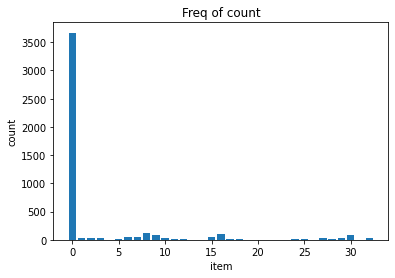

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

freq = defaultdict(int)

for item in len_entity:
    freq[item] += 1

grouped = sorted(freq.items(), key = lambda x:x[1], reverse = True)

items = [item for item, count in grouped]
counts = [count for item, count in grouped]

plt.bar(items, counts)
plt.xlabel('item')
plt.ylabel('count')
plt.title('Freq of count')
plt.show()

In [ ]:
pd.DataFrame(counts, index = [items]).T

,0,8,16,9,30,7,6,15,3,27,...,18,5,28,25,17,24,31,23,13,14
0,3669,125,94,93,88,48,43,42,40,38,...,21,20,17,10,10,7,4,3,1,1


### make dataset

In [ ]:
df_0

,sentences
0,"{'part_id': 0, 'words': ['What', 'kind', 'of',..."
1,"{'part_id': 0, 'words': ['We', 'respectfully',..."
2,"{'part_id': 0, 'words': ['WW', 'II', 'Landmark..."
3,"{'part_id': 0, 'words': ['Standing', 'tall', '..."
4,"{'part_id': 0, 'words': ['It', 'is', 'composed..."
...,...
230,"{'part_id': 8, 'words': ['Taiwan', ''s', 'inve..."
231,"{'part_id': 8, 'words': ['Well', ',', 'why', '..."
232,"{'part_id': 8, 'words': ['Scholars', 'will', '..."
233,"{'part_id': 8, 'words': ['On', 'August', '17',..."


In [ ]:
df_0['sentences'][0]

{'part_id': 0,
 'words': array(['What', 'kind', 'of', 'memory', '?'], dtype=object),
 'pos_tags': array([48, 25, 18, 25,  8]),
 'parse_tree': '(TOP(SBARQ(WHNP(WHNP (WP What)  (NN kind) )(PP (IN of) (NP (NN memory) ))) (. ?) ))',
 'predicate_lemmas': array([None, None, None, 'memory', None], dtype=object),
 'predicate_framenet_ids': array([None, None, None, None, None], dtype=object),
 'word_senses': array([nan, nan, nan,  1., nan], dtype=float32),
 'speaker': 'Speaker#1',
 'named_entities': array([0, 0, 0, 0, 0]),
 'srl_frames': array([], dtype=object),
 'coref_spans': array([], dtype=object)}

In [ ]:
df_0['sentences'][0]['named_entities']

array([0, 0, 0, 0, 0])

In [ ]:
empty_list = []
for i in range(len(df_0)):
    empty_list.append([df_0['sentences'][i]['words'], df_0['sentences'][i]['named_entities']])

In [ ]:
a = pd.DataFrame(empty_list, columns = ['words','ner_tags'])
a

,words,ner_tags
0,"[What, kind, of, memory, ?]","[0, 0, 0, 0, 0]"
1,"[We, respectfully, invite, you, to, watch, a, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0]"
2,"[WW, II, Landmarks, on, the, Great, Earth, of,...","[31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3..."
3,"[Standing, tall, on, Taihang, Mountain, is, th...","[0, 0, 0, 11, 12, 0, 31, 32, 32, 32, 32, 32, 3..."
4,"[It, is, composed, of, a, primary, stele, ,, s...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
230,"[Taiwan, 's, investigation, department, and, p...","[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 0, 0..."
231,"[Well, ,, why, did, Taiwan, 's, investigation,...","[0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
232,"[Scholars, will, give, you, a, detailed, analy...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 0]"
233,"[On, August, 17, ,, Taiwan, 's, investigation,...","[0, 15, 16, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
a['words'] = a['words'].astype(str)

In [ ]:
a

,words,ner_tags
0,nan,"[0, 0, 0, 0, 0]"
1,nan,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0]"
2,nan,"[31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3..."
3,nan,"[0, 0, 0, 11, 12, 0, 31, 32, 32, 32, 32, 32, 3..."
4,nan,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
230,nan,"[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 16, 0, 0..."
231,nan,"[0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
232,nan,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 0]"
233,nan,"[0, 15, 16, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:
a['words'] = a['words'].str.replace('[','').str.replace(']','')
a

AttributeError: ignored

In [ ]:
from datasets import Dataset

a_d = Dataset.from_pandas(a)
a_d

from datasets.dataset_dict import DatasetDict

raw_data = {
     'train':Dataset.from_dict({'words':a_d['words'], 'ner_tags' : a_d['ner_tags']})
     }

raw_data = DatasetDict(raw_data)
raw_data

DatasetDict({
    train: Dataset({
        features: ['words', 'ner_tags'],
        num_rows: 235
    })
})

In [ ]:
raw_data['train'][:1]

{'words': [['What', 'kind', 'of', 'memory', '?']],
 'ner_tags': [[0, 0, 0, 0, 0]]}

### mini-val, test

In [ ]:
df_val_0 = pd.DataFrame(df_val['sentences'][0], columns = ['sentences'])
df_val_0

,sentences
0,"{'part_id': 0, 'words': ['In', 'the', 'summer'..."
1,"{'part_id': 0, 'words': ['With', 'their', 'uni..."
2,"{'part_id': 0, 'words': ['The', 'world', ''s',..."
3,"{'part_id': 0, 'words': ['The', 'most', 'impor..."
4,"{'part_id': 0, 'words': ['Well', ',', 'for', '..."
...,...
209,"{'part_id': 10, 'words': ['Please', 'watch', '..."
210,"{'part_id': 11, 'words': ['The', 'KMT', 'vice'..."
211,"{'part_id': 11, 'words': ['After', 'a', 'long'..."
212,"{'part_id': 11, 'words': ['He', 'said', 'that'..."


In [ ]:
df_val_0['sentences'][0]

{'part_id': 0,
 'words': array(['In', 'the', 'summer', 'of', '2005', ',', 'a', 'picture', 'that',
        'people', 'have', 'long', 'been', 'looking', 'forward', 'to',
        'started', 'emerging', 'with', 'frequency', 'in', 'various',
        'major', 'Hong', 'Kong', 'media', '.'], dtype=object),
 'pos_tags': array([18, 14, 25, 18, 13,  5, 14, 25, 47, 28, 44, 33, 43, 42, 33, 18, 41,
        42, 18, 25, 18, 19, 19, 26, 26, 28,  8]),
 'parse_tree': '(TOP(S(PP (IN In) (NP(NP (DT the)  (NN summer) )(PP (IN of) (NP (CD 2005) )))) (, ,) (NP(NP (DT a)  (NN picture) )(SBAR(WHNP (WDT that) )(S(NP (NNS people) )(VP (VBP have) (ADVP (RB long) )(VP (VBN been) (VP (VBG looking) (ADVP (RB forward) (PP (IN to) ))))))))(VP (VBD started) (S(VP (VBG emerging) (PP (IN with) (NP (NN frequency) ))(PP (IN in) (NP (JJ various)  (JJ major) (NML (NNP Hong)  (NNP Kong) ) (NNS media) ))))) (. .) ))',
 'predicate_lemmas': array([None, None, None, None, None, None, None, None, None, None, 'have',
        None, '

In [ ]:
df_test_0 = pd.DataFrame(df_test['sentences'][0], columns = ['sentences'])
df_test_0

,sentences
0,"{'part_id': 0, 'words': ['--', 'basically', ',..."
1,"{'part_id': 0, 'words': ['To', 'express', 'its..."
2,"{'part_id': 0, 'words': ['It', 'takes', 'time'..."
3,"{'part_id': 0, 'words': ['Dear', 'viewers', ',..."
4,"{'part_id': 0, 'words': ['This', 'is', 'Xu', '..."
...,...
425,"{'part_id': 17, 'words': ['Paris', ',', 'overc..."
426,"{'part_id': 17, 'words': ['Vienna', ',', 'mode..."
427,"{'part_id': 17, 'words': ['New', 'York', ',', ..."
428,"{'part_id': 17, 'words': ['Seattle', ',', 'lig..."


In [ ]:
df_test_0['sentences'][0]

{'part_id': 0,
 'words': array(['--', 'basically', ',', 'it', 'was', 'unanimously', 'agreed',
        'upon', 'by', 'the', 'various', 'relevant', 'parties', '.'],
       dtype=object),
 'pos_tags': array([ 9, 33,  5, 31, 41, 33, 43, 18, 18, 14, 19, 19, 28,  8]),
 'parse_tree': '(TOP(S (: --) (ADVP (RB basically) ) (, ,) (NP (PRP it) )(VP (VBD was) (ADVP (RB unanimously) )(VP (VBN agreed) (PP (IN upon) )(PP (IN by) (NP (DT the)  (JJ various)  (JJ relevant)  (NNS parties) )))) (. .) ))',
 'predicate_lemmas': array([None, None, None, None, 'be', None, 'agree', None, None, None,
        None, None, None, None], dtype=object),
 'predicate_framenet_ids': array([None, None, None, None, '03', None, '01', None, None, None, None,
        None, None, None], dtype=object),
 'word_senses': array([nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan], dtype=float32),
 'speaker': 'speaker#1',
 'named_entities': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'srl_frames': 

In [ ]:
from datasets import Da

## model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModel

# Load the pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModel.from_pretrained("bert-base-cased")

# Add a layer on top of the pre-trained model to predict the NER tags
class NERModel(nn.Module):
    def __init__(self, bert_model):
        super().__init__()
        self.bert = bert_model
        self.fc = nn.Linear(bert_model.config.hidden_size, len(ner_tags))
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        logits = self.fc(outputs[0])
        return logits

# Convert the CoNLL 2012 OntoNotes v5 English dataset into input tensors
def preprocess_data(texts, labels, tokenizer):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

SyntaxError: ignored